In [5]:
# Pandas is used for data manipulation and numpy to convert to arrays
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sqlalchemy import create_engine


list =["AK","DC","CA","MA"]
# Store CSV into DataFrame
# Read in data and display first 5 rows
AQI_data = pd.read_csv('Resources/AQI_data.csv')
AQI_data.head(5)

,Date,AQI,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,State,Lat,Long
0,2020-11-27 05:00:00,1,195.27,0.0,0.03,54.36,0.06,0.5,0.54,0.0,AK,63.588753,-154.493062
1,2020-11-27 06:00:00,1,196.93,0.0,0.03,56.51,0.06,0.5,0.54,0.0,AK,63.588753,-154.493062
2,2020-11-27 07:00:00,1,198.60,0.0,0.03,57.94,0.07,0.5,0.54,0.0,AK,63.588753,-154.493062
3,2020-11-27 08:00:00,1,198.60,0.0,0.03,58.65,0.07,0.5,0.54,0.0,AK,63.588753,-154.493062
4,2020-11-27 09:00:00,1,198.60,0.0,0.03,58.65,0.07,0.5,0.54,0.0,AK,63.588753,-154.493062


In [6]:
print(AQI_data.shape)

(26560, 13)


In [7]:
## Trying to establish connection
## Will add "from OpenWeather_AQI_DB_Final import df, df, df" to dependencies and query the 
## slection of data when DB file is finalized and successful 

#rds_connection_string = "<root>:<drowssap>@RDS:final-project-db.ch7spkcdsndt.us-east-2.rds.amazonaws.com"
# engine = create_engine(f'postgresql://{rds_connection_string}')

ValueError: invalid literal for int() with base 10: 'final-project-db.ch7spkcdsndt.us-east-2.rds.amazonaws.com'

In [8]:
# Descriptive statistics for each column
#All cells are full, verifying there aren't gaps/missing values to clean/remove associated values
# Labels are the values we want to predict
AQI_copy = AQI_data
labels = AQI_data['AQI']
features = AQI_data.drop(['Date', 'AQI', 'State','Lat', 'Long'], axis=1)
# ['CO','NO','NO2','O3','SO2', 'PM2_5', 'PM10', 'NH3']

In [9]:
# Using Skicit-learn to split data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=1)
# test_size = 0.25 or another test size could be added if needed

In [10]:
#evaluating the output of the training split
features_train

,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
19538,250.34,0.05,0.98,147.34,0.90,27.67,29.04,1.54
21960,247.00,0.00,3.51,83.69,0.49,1.56,2.01,0.64
19630,393.87,0.14,1.30,130.18,1.43,55.22,64.18,4.81
14724,247.00,0.00,4.28,41.49,0.04,1.49,2.28,1.82
13708,213.62,0.02,4.84,45.06,0.17,2.68,4.11,0.82
...,...,...,...,...,...,...,...,...
10955,347.14,0.29,24.68,89.41,5.25,18.59,20.53,1.44
17289,191.93,0.00,3.04,68.67,0.32,8.09,10.19,2.47
5192,150.20,0.00,0.14,77.96,0.02,0.50,0.54,0.00
12172,257.02,0.41,4.07,118.73,4.35,8.37,8.93,0.22


In [11]:
 #evaluating the output of the testing split
features_test

,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
8652,427.25,0.16,35.64,25.75,9.54,11.50,12.74,0.90
23863,213.62,0.44,2.64,62.94,0.68,1.69,2.11,0.36
2257,220.30,0.00,0.93,63.66,0.15,0.50,0.50,0.02
12587,423.91,0.37,31.19,74.39,5.31,6.66,7.68,1.63
12339,283.72,0.44,3.60,124.45,3.10,5.21,6.07,0.57
...,...,...,...,...,...,...,...,...
24195,191.93,0.00,2.01,82.25,0.50,0.88,1.72,0.09
25369,247.00,0.00,10.03,23.60,1.76,4.85,5.55,0.09
7759,340.46,5.98,21.42,54.36,16.69,19.62,22.32,0.38
17506,190.26,0.00,2.36,47.92,0.20,2.37,3.45,2.41


In [12]:
scaler = StandardScaler().fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [13]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 400 decision trees
rclf = RandomForestClassifier(n_estimators = 400, random_state = 1)
# Train the model on training data
rclf.fit(features_train_scaled, labels_train)

print(f'Training Score: {rclf.score(features_train_scaled, labels_train)}')
print(f'Testing Score: {rclf.score(features_test_scaled, labels_test)}')

Training Score: 1.0
Testing Score: 0.9998493975903614


In [14]:
#Why is the mean abs error 0?
# Use the forest's predict method on the test data
predictions = rclf.predict(features_test)
# Calculate the absolute errors
errors = abs(predictions - labels_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 3.01 degrees.


In [15]:
# Calculate mean absolute percentage error (MAPE)
mape = (errors / labels_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 97.46 %.


In [16]:
feature_importances = rclf.feature_importances_
results = sorted(zip(features.columns, rclf.feature_importances_), key = lambda x: x[1])
results

[('NH3', 0.019241847499193446),
 ('NO', 0.02731545490447818),
 ('CO', 0.030202442049996375),
 ('SO2', 0.039507363832118295),
 ('NO2', 0.04602878504395286),
 ('PM10', 0.1435009331307897),
 ('PM2_5', 0.23227482013257414),
 ('O3', 0.4619283534068971)]

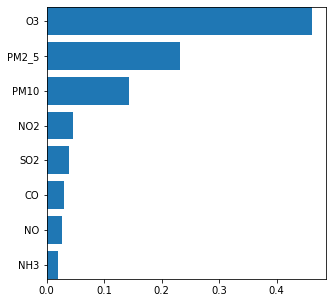

In [17]:
# The goal was/is to show the importance of the polutants on the AQI score

cols = [r[0] for r in results]
width = [r[1] for r in results]

fig, ax = plt.subplots()

fig.set_size_inches(5,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [ ]:
## Considering another classifier model

# X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_features), y_train_labels, random_state=1)
# scaler = StandardScaler().fit(X_selected_train)
# X_selected_train_scaled = scaler.transform(X_selected_train)
# X_selected_test_scaled = scaler.transform(X_selected_test)

# rclf = LogisticRegression().fit(X_train_features, y_train)
# print(f'Training Score: {rclf.score(X_train_features, y_train_labels)}')
# print(f'Testing Score: {rclf.score(X_test_features, y_test_labels)}')

In [ ]:
#query using different fileters from databases

In [ ]:
## Considering AdaBoost CLassifier

# from sklearn.ensemble import AdaBoostClassifier
#   from sklearn.datasets import make_classification
#   X, y = make_classification(n_samples=1000, n_features=4,
# ...                            n_informative=2, n_redundant=0,
# ...                            random_state=0, shuffle=False)
#   clf = AdaBoostClassifier(n_estimators=100, random_state=0)
#   clf.fit(X, y)
# AdaBoostClassifier(n_estimators=100, random_state=0)
#   clf.predict([[0, 0, 0, 0]])
# array([1])
#   clf.score(X, y)
# 0.983...

In [ ]:
# class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]¶

In [ ]:
## import numpy as np
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
# from sklearn.svm import SVC
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X, y)
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('svc', SVC(gamma='auto'))])

In [18]:
!pip install xgboost

In [19]:
# check xgboost version? Cofused by this error, unable to try associated classifier model - see sample below
import xgboost
print(xgboost.__version__)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# # test classification dataset
# from sklearn.datasets import make_classification
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# # summarize the dataset
# print(X.shape, y.shape)

In [ ]:
# # make predictions using xgboost for classification
# from numpy import asarray
# from sklearn.datasets import make_classification
# from xgboost import XGBClassifier
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# # define the model
# model = XGBClassifier()
# # fit the model on the whole dataset
# model.fit(X, y)
# # make a single prediction
# row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
# row = asarray([row])
# yhat = model.predict(row)
# print('Predicted Class: %d' % yhat[0])

# # make predictions using xgboost for classification
# from numpy import asarray
# from sklearn.datasets import make_classification
# from xgboost import XGBClassifier
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# # define the model
# model = XGBClassifier()
# # fit the model on the whole dataset
# model.fit(X, y)
# # make a single prediction
# row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
# row = asarray([row])
# yhat = model.predict(row)
# print('Predicted Class: %d' % yhat[0])